In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications import imagenet_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y
  

In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Train_UCMerced_LandUse.h5', 'r')
    train_set_x_orig = np.array(train_dataset["X_train_dataset"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["Y_train_dataset"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Test_UCMerced_LandUse.h5', 'r')
    test_set_x_orig = np.array(test_dataset["X_test_dataset"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["Y_test_dataset"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (Dataset)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 20


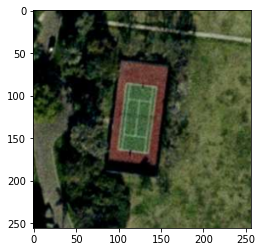

In [ ]:
index = 20
plt.imshow(Image.fromarray(X_train_orig[index].astype(np.uint8)))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
#X_train=np.zeros((1680,1024))
#X_test=np.zeros((420,1024))
#UCMLBP_Out = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Features/UCMerced_LandUse_LBP32SKI.h5', 'r')
#XXXXXT = np.array(UCMLBP_Out["X_train_dataset_LBP"][:])
#XXXXXS = np.array(UCMLBP_Out["X_test_dataset_LBP"][:])
#UCMLBP_Out.close()

#for i in range(X_train.shape[0]):
#  X_train[i]=XXXXXT[j].flatten()
#for j in range(X_test.shape[0]):
#  X_test[j]=XXXXXS[j].flatten()

Densnet_Out = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/Desnet_Out.h5', 'r')
X_train = np.array(Densnet_Out["train_OutDesnet"][:])
X_test = np.array(Densnet_Out["test_OutDesnet"][:])
Densnet_Out.close()

Y_train = convert_to_one_hot(Y_train_orig.T, 21)
Y_test = convert_to_one_hot(Y_test_orig.T, 21)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1680
number of test examples = 420
X_train shape: (1680, 1664)
Y_train shape: (1680, 21)
X_test shape: (420, 1664)
Y_test shape: (420, 21)


In [ ]:
Resnet_Out = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/Resnet_Out.h5', 'r')
Txtrain = np.array(Resnet_Out["train_OutResnet"][:])
Txtest = np.array(Resnet_Out["test_OutResnet"][:])
Resnet_Out.close()

print("Txtrain Shape:", Txtrain.shape)
print("Txtest Shape:", Txtest.shape)

Txtrain Shape: (1680, 2048)
Txtest Shape: (420, 2048)


In [ ]:
Xtrain = np.zeros((X_train_orig.shape[0],3712))
Xtest = np.zeros((X_test_orig.shape[0],3712))

for i in range(X_train_orig.shape[0]):
     Xtrain[i] = np.concatenate((Txtrain[i], X_train[i]), axis=0)
     
for j in range(X_test_orig.shape[0]):
     Xtest[j] = np.concatenate((Txtest[j], X_test[j]), axis=0)

print("Xtrain Shape:", Xtrain.shape)
print("Xtest Shape:", Xtest.shape)

Xtrain Shape: (1680, 3712)
Xtest Shape: (420, 3712)


In [ ]:
model = models.Sequential()
model.add(layers.Input(shape = (3712)))
model.add(layers.ReLU())
model.add(layers.Dropout(0.88))
model.add(layers.Dense(21, activation='softmax'))
print(model.summary())

optimizers.Adam(learning_rate=0.1, name="Adam")
model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

Vhistory = model.fit(Xtrain, Y_train, epochs=200, batch_size=64, validation_split = 0.25)

train_loss, train_acc = model.evaluate(Xtrain,  Y_train, verbose=1)
print("Loss: ", train_loss, " Train Accuracy: ", train_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
re_lu_2 (ReLU)               (None, 3712)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3712)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 21)                77973     
Total params: 77,973
Trainable params: 77,973
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
20/20 [==============================] - 1s 17ms/step - loss: 6.0286 - accuracy: 0.0801 - val_loss: 1.5770 - val_accuracy: 0.5238
Epoch 2/200
20/20 [==============================] - 0s 8ms/step - loss: 3.4591 - accuracy: 0.3053 - val_loss: 0.9296 - val_accuracy: 0.7024
Epoch 3/200
20/20 [==============================] - 0s 9ms/step - loss: 1.9964 - accuracy: 

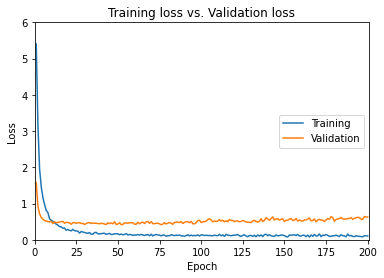

In [ ]:
epochs = len(Vhistory.history['loss'])
max_loss = max(max(Vhistory.history['loss']), max(Vhistory.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['loss'])
plt.plot(x, Vhistory.history['val_loss'])
plt.title('Training loss vs. Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

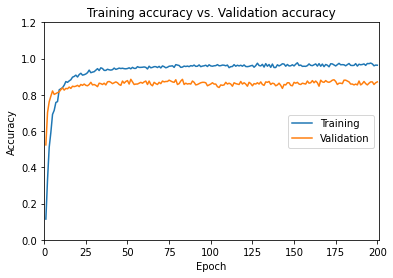

In [ ]:
epochs = len(Vhistory.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['accuracy'])
plt.plot(x, Vhistory.history['val_accuracy'])
plt.title('Training accuracy vs. Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right')
plt.show()

In [ ]:
epochs = np.argmin(Vhistory.history['val_loss']) + 1

history = model.fit(Xtrain , Y_train, epochs=epochs, verbose=1, batch_size=64)

train_loss, train_acc = model.evaluate(Xtrain ,  Y_train, verbose=1)
print("Loss: ", train_loss, " Train Accuracy: ", train_acc)

test_loss, test_acc = model.evaluate(Xtest,  Y_test, verbose=1)
print("Loss: ", test_loss, " Test Accuracy: ", test_acc)

Epoch 1/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.9673
Epoch 2/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1523 - accuracy: 0.9720
Epoch 3/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9714
Epoch 4/76
27/27 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.9625
Epoch 5/76
27/27 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.9661
Epoch 6/76
27/27 [==============================] - 0s 6ms/step - loss: 0.1528 - accuracy: 0.9643
Epoch 7/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1719 - accuracy: 0.9690
Epoch 8/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1362 - accuracy: 0.9696
Epoch 9/76
27/27 [==============================] - 0s 7ms/step - loss: 0.1799 - accuracy: 0.9679
Epoch 10/76
27/27 [==============================] - 0s 6ms/step - loss: 0.1484 - accuracy: 0.9702
Epoch 11/76
27/27 [

In [ ]:
mmmodel = models.load_model('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_model')
train_loss, train_acc = mmmodel.evaluate(Xtrain ,  Y_train, verbose=1)
print("Loss: ", train_loss, " Train Accuracy: ", train_acc)

test_loss, test_acc = mmmodel.evaluate(Xtest,  Y_test, verbose=1)
print("Loss: ", test_loss, " Test Accuracy: ", test_acc)

60/60 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9974
Loss:  0.00961408019065857  Train Accuracy:  0.9973958134651184
15/15 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9625
Loss:  0.24399520456790924  Test Accuracy:  0.9624999761581421


In [ ]:
model.save('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_model')
model.save_weights('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_Wieghts.h5')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_model/assets


In [ ]:
print(Txtrain[18])   

[0.00000000e+00 0.00000000e+00 1.80010404e-03 ... 1.96212125e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
import pandas as pd

array1 = np.zeros((200,2))
array1[:,0] = Vhistory.history['loss']
array1[:,1] = Vhistory.history['val_loss']

array2 = np.zeros((200,2))
array2[:,0] = Vhistory.history['accuracy']
array2[:,1] = Vhistory.history['val_accuracy']

df1 = pd.DataFrame(array1)
df1.to_excel("/content/drive/My Drive/ResML.xlsx", sheet_name='Merced Loss')

df2 = pd.DataFrame(array2)
df2.to_excel("/content/drive/My Drive/ResMA.xlsx", sheet_name='Merced accuracy')